In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhanupratapbiswas/inventory-analysis-case-study")

print("Path to dataset files:", path)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/bhanupratapbiswas/inventory-analysis-case-study/versions/1


In [4]:
os.chdir('/home/codespace/.cache/kagglehub/datasets/bhanupratapbiswas/inventory-analysis-case-study/versions/1')

In [5]:
#Cargar datasets
beg_inv = pd.read_csv('BegInvFINAL12312016.csv')
end_inv = pd.read_csv('EndInvFINAL12312016.csv')
sales = pd.read_csv('SalesFINAL12312016.csv')
purchases = pd.read_csv('PurchasesFINAL12312016.csv')
invoice_purchases = pd.read_csv('InvoicePurchases12312016.csv')
purchase_prices = pd.read_csv('2017PurchasePricesDec.csv')

In [6]:
# Ver las dimensiones del dataset

print("Dimensiones de cada archivo:")
print("Inventario Inicial:", beg_inv.shape)
print("Inventario Final:", end_inv.shape)
print("Compras:", purchases.shape)
print("Facturas de Compras:", invoice_purchases.shape)
print("Precios de compras:", invoice_purchases.shape)
print("Ventas:", sales.shape)

Dimensiones de cada archivo:
Inventario Inicial: (206529, 9)
Inventario Final: (224489, 9)
Compras: (2372474, 16)
Facturas de Compras: (5543, 10)
Precios de compras: (5543, 10)
Ventas: (1048575, 14)


In [7]:
print("purchase_prices Columns:")
print(purchase_prices.columns.tolist())

print("\nbeg_inv Columns:")
print(beg_inv.columns.tolist())

print("\nend_inv Columns:")
print(end_inv.columns.tolist())

print("\ninvoice_purchases Columns:")
print(invoice_purchases.columns.tolist())

print("\npurchases Columns:")
print(purchases.columns.tolist())

print("\nsales Columns:")
print(sales.columns.tolist())

purchase_prices Columns:
['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification', 'PurchasePrice', 'VendorNumber', 'VendorName']

beg_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'startDate']

end_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']

invoice_purchases Columns:
['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']

purchases Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']

sales Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']


In [8]:
# Mostrar nombres de columnas y una vista previa de cada conjunto de datos para identificar inconsistencias
print("Columnas y primeras filas de cada archivo:")

print("Inventario Inicial:")
print(beg_inv.head(10))
print('beg_inv info: ')
print(beg_inv.info())
print('beg_inv null values: ')
print(beg_inv.isnull().sum())
print('beg_inv duplicated: ')
print(beg_inv.duplicated().value_counts())

print("\nInventario Final:")
print(end_inv.head(10))
print('end_inv info: ')
print(end_inv.info())
print('end_inv null values: ')
print(end_inv.isnull().sum())
print('end_inv duplicated: ')
print(end_inv.duplicated().value_counts())

print("\nCompras:")
print(purchases.head(10))
print('purchases info: ')
print(purchases.info())
print('purchases null values: ')
print(purchases.isnull().sum())
print('purchases duplicated: ')
print(purchases.duplicated().value_counts())

print("\nFacturas de Compras:")
print(invoice_purchases.head(10))
print('invoice_purchases info: ')
print(invoice_purchases.info())
print('invoice_purchases null values: ')
print(invoice_purchases.isnull().sum())
print('invoice_purchases duplicated: ')
print(invoice_purchases.duplicated().value_counts())

print("\nPrecio de compras:")
print(purchase_prices.head(10))
print('purchase_prices info: ')
print(purchase_prices.info())
print('purchase_prices null values: ')
print(purchase_prices.isnull().sum())
print('purchase_prices duplicated: ')
print(purchase_prices.duplicated().value_counts())

print("\nVentas:")
print(sales.head(10))
print('sales info: ')
print(sales.info())
print('sales null values: ')
print(sales.isnull().sum())
print('sales duplicated: ')
print(sales.duplicated().value_counts())

Columnas y primeras filas de cada archivo:
Inventario Inicial:
          InventoryId  Store          City  Brand  \
0   1_HARDERSFIELD_58      1  HARDERSFIELD     58   
1   1_HARDERSFIELD_60      1  HARDERSFIELD     60   
2   1_HARDERSFIELD_62      1  HARDERSFIELD     62   
3   1_HARDERSFIELD_63      1  HARDERSFIELD     63   
4   1_HARDERSFIELD_72      1  HARDERSFIELD     72   
5   1_HARDERSFIELD_75      1  HARDERSFIELD     75   
6   1_HARDERSFIELD_77      1  HARDERSFIELD     77   
7   1_HARDERSFIELD_79      1  HARDERSFIELD     79   
8  1_HARDERSFIELD_115      1  HARDERSFIELD    115   
9  1_HARDERSFIELD_120      1  HARDERSFIELD    120   

                   Description   Size  onHand  Price   startDate  
0  Gekkeikan Black & Gold Sake  750mL       8  12.99  2016-01-01  
1       Canadian Club 1858 VAP  750mL       7  10.99  2016-01-01  
2     Herradura Silver Tequila  750mL       6  36.99  2016-01-01  
3   Herradura Reposado Tequila  750mL       3  38.99  2016-01-01  
4         No. 3 Lo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB
None
end_inv null values: 
InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64
end_inv duplicated: 
False    224489
Name: count, dtype: int64

Compras:
           InventoryId  Store  Brand                   Descri

In [9]:
#  De la exploración de los datos podemos observar:
# - Tanto inventario inicial como inventario final presentan las misma columnas.
# - Podemos observar que algunas tablas presentan valores faltantes.
# - El formato de fecha es diferente entre las tablas. La tabla "sales" tiene un formato m/d/yyyy, minetras
# las otras tablas presentan un formato yyyy/mm/dd
# - Se presentan inconsistencias en la columna "Size" de todas las tablas, ya que se utilizan diferentes unidades de medición.
# Por ejemplo, algunas tablas presentan un formato 750 mL, en otras Liter, en otras 1.75L, 375mL 2 Pk. Por tanto, es necesario
# unificar la unidad de medida.
# No hay valores duplicados.

# Manejo de valores faltantes:
#      En el inventario final la columna "City" presenta 1284 valores faltantes de 224489 entradas. Si comparamos las columnas "InventoryId"
# de las tablas de inventario inicial y final, podemos ver que los valores faltantes de la columna "City" del inventario final, se
# correponden con la tienda 46. Esta tienda se indica como 46_TYWARDREATH en la columna "InventoryId" presente en la tabla de inventario
# inicail. Por lo tanto, podemos rellenar los valores faltantes de las filas de la columna "City" con el nombre TYWARDREATH.
#      En la tabla compras, solo se presentan 3 vlaores faltantes en la columna "Size". Podemos eliminar estas filas o rellenarlas
#      En la tabla facturas de compra, se presentan 5169 valores faltantes de 5543 entradas. Son demasiados datos faltantes, por lo tanto
# podemos desestimar la columna y eliminarla.
#      En la tabla precio de compra, solo hay 1 valor faltante en cada una de las columnas "Description", "Size" y "Volume".
# Podemos eliminar las filas con los datos faltantes. Además, la comlumna "Volume" indica lo mismo que la columna "Size" por lo que
# sería de utilidad eliminar dicha columna. También se elimina la columna "Volume" de la tabla ventas.

In [10]:
# Manejo de datos faltantes

In [11]:
# Realizar copia del dataset
beg_inv_f = beg_inv.copy() 
end_inv_f = end_inv.copy()
purchases_f = purchases.copy()
invoice_purchases_f= invoice_purchases.copy()
purchase_prices_f = purchase_prices.copy()
sales_f = sales.copy()

In [12]:
# Rellenar datos faltantes en la columna "City" del inventario final
end_inv_f["City"] = end_inv_f["City"].fillna("TYWARDREATH")

# Eliminar filas con valores faltantes en "Size" en la tabla compras
purchases_f.dropna(subset=["Size"], inplace=True)

# Eliminar columna "Approval" de la tabla facturas de compra
invoice_purchases_f = invoice_purchases_f.drop(['Approval'], axis=1)

# Eliminar valores faltantes de las columnas "Description" y "Size" de la tabla precios de compra
purchase_prices_f.dropna(subset=["Description"], inplace=True)
purchase_prices_f.dropna(subset=["Size"], inplace=True)

# Eliminar columna "Volume" de la tabla precios de compra
purchase_prices_f = purchase_prices_f.drop(["Volume"], axis=1)
sales_f = sales_f.drop(["Volume"], axis = 1)


In [13]:
print('beg_inv_f columns:')
print(beg_inv_f.columns)
print('beg_inv_f null values: ')
print(beg_inv_f.isnull().sum().value_counts())

print('end_inv_f columns:')
print(end_inv_f.columns)
print('end_inv_f null values: ')
print(end_inv_f.isnull().sum().value_counts())

print('purchases_f columns:')
print(purchases_f.columns)
print('purchases_f null values: ')
print(purchases_f.isnull().sum().value_counts())

print('invoice_purchases_f columns:')
print(invoice_purchases_f.columns)
print('invoice_purchases_f null values: ')
print(invoice_purchases_f.isnull().sum().value_counts())

print('purchase_prices_f columns:')
print(purchase_prices_f.columns)
print('purchase_prices_f null values: ')
print(purchase_prices_f.isnull().sum().value_counts())

print('sales_f columns:')
print(sales_f.columns)
print('sales_f null values: ')
print(sales_f.isnull().sum().value_counts())

beg_inv_f columns:
Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'startDate'],
      dtype='object')
beg_inv_f null values: 
0    9
Name: count, dtype: int64
end_inv_f columns:
Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'endDate'],
      dtype='object')
end_inv_f null values: 
0    9
Name: count, dtype: int64
purchases_f columns:
Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')
purchases_f null values: 
0    16
Name: count, dtype: int64
invoice_purchases_f columns:
Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight'],
      dtype='object')
invoice_purchases_f null values: 
0    9
Name: count, dtype: int64
purch

In [14]:
# Estandarizar el formato de fecha
def format_time(df, *columns, date_format='%Y-%m-%d'):
  
    for col in columns:
        try:
            df[col] = pd.to_datetime(df[col], errors='coerce')  # Convierte a datetime
            df[col] = df[col].dt.strftime(date_format)          # Aplica formato
        except Exception as e:
            print(f"Error al procesar la columna {col}: {e}")
    return df


beg_inv_f = format_time(beg_inv_f, "startDate")
end_inv_f = format_time(end_inv_f, "endDate")
purchases_f = format_time(purchases_f, "PODate", "ReceivingDate", "InvoiceDate", "PayDate")
invoice_purchases_f = format_time(invoice_purchases_f, "InvoiceDate", "PODate", "PayDate")
sales_f = format_time(sales_f, "SalesDate")

In [15]:
# Eliminar espacios en todas las columnas tipo texto.
def strip_spaces(df):
   
    for col in df.select_dtypes(include=['object', 'string']).columns:
        df[col] = df[col].str.strip()
    return df

# Aplicar la función a cada archivo
beg_inv_f = strip_spaces(beg_inv_f)
end_inv_f = strip_spaces(end_inv_f)
purchases_f = strip_spaces(purchases_f)
invoice_purchases_f = strip_spaces(invoice_purchases_f)
sales_f = strip_spaces(sales_f)

# Confirmar que se eliminaron los espacios
print(beg_inv_f.head())
print(end_inv_f.head())
print(purchases_f.head())
print(invoice_purchases_f.head())
print(sales_f.head())

         InventoryId  Store          City  Brand                  Description  \
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake   
1  1_HARDERSFIELD_60      1  HARDERSFIELD     60       Canadian Club 1858 VAP   
2  1_HARDERSFIELD_62      1  HARDERSFIELD     62     Herradura Silver Tequila   
3  1_HARDERSFIELD_63      1  HARDERSFIELD     63   Herradura Reposado Tequila   
4  1_HARDERSFIELD_72      1  HARDERSFIELD     72         No. 3 London Dry Gin   

    Size  onHand  Price   startDate  
0  750mL       8  12.99  2016-01-01  
1  750mL       7  10.99  2016-01-01  
2  750mL       6  36.99  2016-01-01  
3  750mL       3  38.99  2016-01-01  
4  750mL       6  34.99  2016-01-01  
         InventoryId  Store          City  Brand                  Description  \
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake   
1  1_HARDERSFIELD_62      1  HARDERSFIELD     62     Herradura Silver Tequila   
2  1_HARDERSFIELD_63      1  HARDERSFIELD 

In [16]:
# Combinar las columnas "Size" de los DataFrames, ignorando las ausentes
data_frames = [beg_inv_f, end_inv_f, purchases_f, purchase_prices_f, sales_f]
all_sizes = pd.concat([df["Size"] for df in data_frames if "Size" in df.columns], ignore_index=True)

# Contar las ocurrencias únicas directamente con value_counts
size_counts = all_sizes.value_counts().reset_index()
size_counts.columns = ["Size", "Total Count"]

pd.set_option('display.max_rows', None)

# Mostrar el resultado
print(size_counts)

pd.reset_option('display.max_rows')

           Size  Total Count
0         750mL      2113362
1         1.75L       809721
2          1.5L       322129
3          50mL       195549
4         375mL       139094
5         Liter        73920
6            3L        71949
7            5L        69059
8    187mL 4 Pk        16693
9         500mL         9338
10           4L         8288
11        187mL         5023
12        100mL         3773
13        200mL         3386
14   100mL 4 Pk         2220
15    50mL 5 Pk         2215
16   250mL 4 Pk         2068
17    50mL 4 Pk         2056
18   200mL 4 Pk         1903
19        300mL         1687
20   187mL 3 Pk         1586
21        250mL          935
22    50mL 3 Pk          863
23        720mL          630
24   750mL 2 Pk          628
25       5.0 Oz          607
26   375mL 2 Pk          544
27      3/100mL          514
28   750mL + 1/          491
29       1500mL          486
30   200mL 3 Pk          479
31       1750mL          433
32       1000mL          427
33        330m

In [17]:
# Podemos observar que hay 76 diferentes tipos de medidas para expresar el volumen.
# Se observan diferentes expresiones de medidas de volumen.
#   - Para referenciar litro encontramos referencias como: Liter, L o l.
#   - Se observan volúmenes expresados en Oz.
#   - Hay otros patrones como 750mL, 375mL 2 Pk, 25.0, etc.
# 
# Debemos estandarizar la medida de volumen

In [18]:
import re

# Función para estandarizar las medidas de volumen en mililitros (mL)
def convert_to_milliliters(size):
    size = str(size).lower()
    
    # Manejo del caso "3/100ml" y "5/2 oz"
    if "3/100ml" in size: 
        return 3 * 100  # 3/100ml → 3 paquetes de 100ml
    elif '5/2 oz' in size: 
        return round(10 * 29.5735, 2)  # 5/2 oz → 10 onzas (1/2 * 5)

    # Convertir galones a mililitros
    elif 'gal' in size:
        gal_value = float(re.search(r'\d+\.*\d*', size).group())
        return round(gal_value * 3785.41, 2)  # 1 gal = 3785.41 mL

    # Manejar patrones como "750ml", "750mL + 3/", "750 4pk", etc.
    elif 'ml' in size:
        if 'p' in size:
            ml_value, pack_value = re.search(r'(\d+\.*\d*)\s*m*l*\s*(\d*)\s*p*/*P*k*/*', size).groups()
            ml_value = float(ml_value)
            pack_value = float(pack_value) if pack_value else 1
            return round(ml_value * pack_value, 2)  # Multiplicar por el número de paquetes
        elif '+' in size:
            ml_value, pack_value = map(float, re.findall(r'\d+\.*\d*', size))
            return round(ml_value + (pack_value * 50), 2)  # Sumar la cantidad adicional
        else:
            ml_value = float(re.search(r'\d+\.*\d*', size).group())
            return round(ml_value, 2)

    # Convertir litros a mililitros
    elif 'liter' in size or 'l' in size:
        if size == 'liter' or size == 'l': 
            return 1000.0
        else:
            liter_value = float(re.search(r'\d+\.*\d*', size).group())
            return round(liter_value * 1000, 2)  # 1 litro = 1000 mL

    # Convertir onzas líquidas (oz) a mililitros
    elif 'oz' in size:
        oz_value = float(re.search(r'\d+\.*\d*', size).group())
        return round(oz_value * 29.5735, 2)  # 1 oz = 29.5735 mL

    # Retornar None si no se puede interpretar
    else:
        return None

# Lista de DataFrames
datasets = [beg_inv_f, end_inv_f, purchases_f, purchase_prices_f, sales_f]

# Aplicar la función de conversión a cada DataFrame
for i, dataset in enumerate(datasets):
    if "Size" in dataset.columns:  # Verificar si la columna "Size" existe
        dataset['Size'] = dataset['Size'].apply(convert_to_milliliters)
        datasets[i] = dataset

# Imprimir los resultados convertidos
for i, dataset in enumerate(datasets):
    print(f"DataFrame {i + 1}:")
    print(dataset)
    print()

DataFrame 1:
               InventoryId  Store          City  Brand  \
0        1_HARDERSFIELD_58      1  HARDERSFIELD     58   
1        1_HARDERSFIELD_60      1  HARDERSFIELD     60   
2        1_HARDERSFIELD_62      1  HARDERSFIELD     62   
3        1_HARDERSFIELD_63      1  HARDERSFIELD     63   
4        1_HARDERSFIELD_72      1  HARDERSFIELD     72   
...                    ...    ...           ...    ...   
206524  79_BALLYMENA_46985     79     BALLYMENA  46985   
206525  79_BALLYMENA_47014     79     BALLYMENA  47014   
206526  79_BALLYMENA_47090     79     BALLYMENA  47090   
206527  79_BALLYMENA_90011     79     BALLYMENA  90011   
206528  79_BALLYMENA_90089     79     BALLYMENA  90089   

                         Description   Size  onHand   Price   startDate  
0        Gekkeikan Black & Gold Sake  750.0       8   12.99  2016-01-01  
1             Canadian Club 1858 VAP  750.0       7   10.99  2016-01-01  
2           Herradura Silver Tequila  750.0       6   36.99  2016-01

In [19]:
# Análisis de inventario
# En esta sección, analizaremos los parámetros fundamentales de la gestión de inventario y extraeremos información relevante sobre
# stock e inventario disponible.

# Se buscará:
# 1. Detectar y analizar outliers.
# 2. Visualizar la información de manera más clara.
# 3. Agregar contexto relevante (proveedor, riesgo).

In [20]:
purchases_f['ReceivingDate'] = pd.to_datetime(purchases_f['ReceivingDate'], format='%Y-%m-%d', errors='coerce')
purchases_f['PODate'] = pd.to_datetime(purchases_f['PODate'], format='%Y-%m-%d', errors='coerce')

# Calcular el plazo de entrega en días
purchases_f['Lead_Time'] = (purchases_f['ReceivingDate'] - purchases_f['PODate']).dt.days

# Agrupación adicional por proveedor
LT_summary = purchases_f.groupby(['Brand', 'Description']).agg(
    Max_LT_inDays=('Lead_Time', 'max'), 
    Min_LT_inDays=('Lead_Time', 'min'), 
    Avg_LT_inDays=('Lead_Time', 'mean')).round(2).reset_index()

# Identificar outliers en Lead_Time usando IQR
q1 = purchases_f['Lead_Time'].quantile(0.25)
q3 = purchases_f['Lead_Time'].quantile(0.75)
iqr = q3 - q1
outlier_threshold_low = q1 - 1.5 * iqr
outlier_threshold_high = q3 + 1.5 * iqr

# Filtrar outliers
outliers = purchases_f[(purchases_f['Lead_Time'] < outlier_threshold_low) | 
                       (purchases_f['Lead_Time'] > outlier_threshold_high)]
print(f"Número de outliers detectados: {len(outliers)}")

Número de outliers detectados: 1637


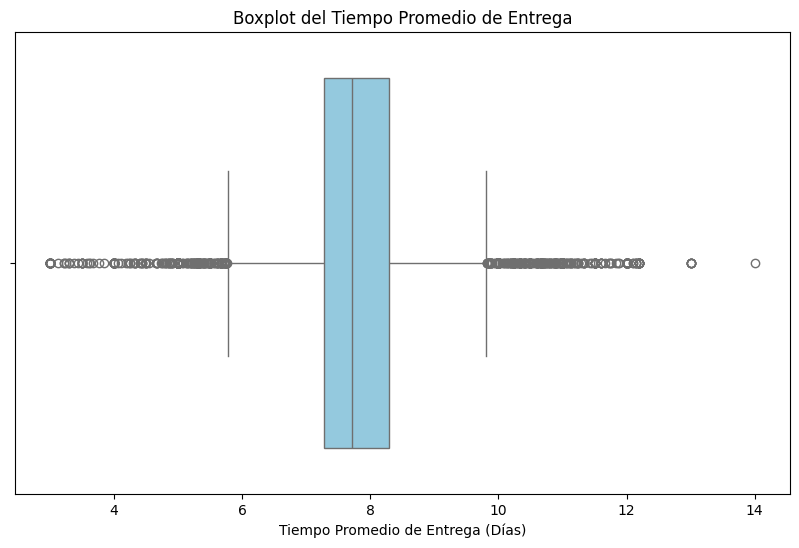

In [21]:
# Boxplot para tiempos de entrega
plt.figure(figsize=(10, 6))
sns.boxplot(data=LT_summary, x="Avg_LT_inDays", color="skyblue")
plt.title("Boxplot del Tiempo Promedio de Entrega")
plt.xlabel("Tiempo Promedio de Entrega (Días)")
plt.show()


In [22]:
# El gráfico de caja muestra la distribución de los plazos de entrega promedio de los productos. 
# La mayoría de los productos tienen un plazo de entrega promedio de aproximadamente 7 u 8 días, 
# como lo muestra la distribución normal. Por lo tanto, la mayoría de los vendedores entregan los 
# productos en el plazo de una semana.

Riesgo
Riesgo Medio    10470
Riesgo Bajo       193
Name: count, dtype: int64


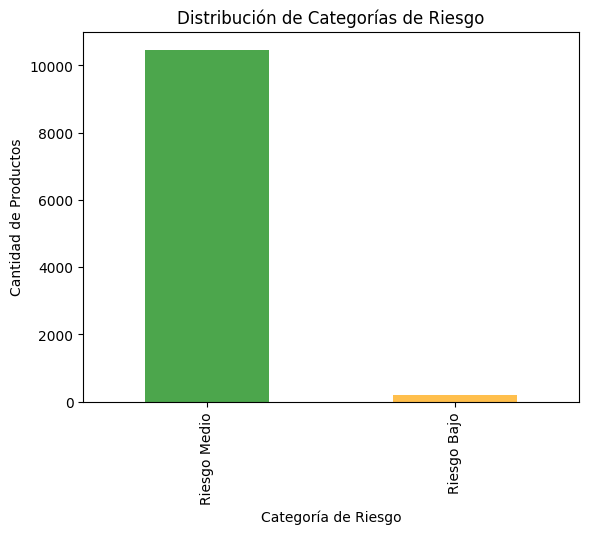

In [23]:
# Clasificar productos según tiempo máximo de entrega
def categorize_lead_time(max_lt):
    if max_lt <= 5:
        return "Riesgo Bajo"
    elif 5 < max_lt <= 15:
        return "Riesgo Medio"
    else:
        return "Riesgo Alto"

LT_summary['Riesgo'] = LT_summary['Max_LT_inDays'].apply(categorize_lead_time)

# Ver distribución de categorías de riesgo
risk_distribution = LT_summary['Riesgo'].value_counts()
print(risk_distribution)

# Gráfico de barras para distribución de riesgo
risk_distribution.plot(kind='bar', color=['green', 'orange', 'red'], alpha=0.7)
plt.title("Distribución de Categorías de Riesgo")
plt.xlabel("Categoría de Riesgo")
plt.ylabel("Cantidad de Productos")
plt.show()

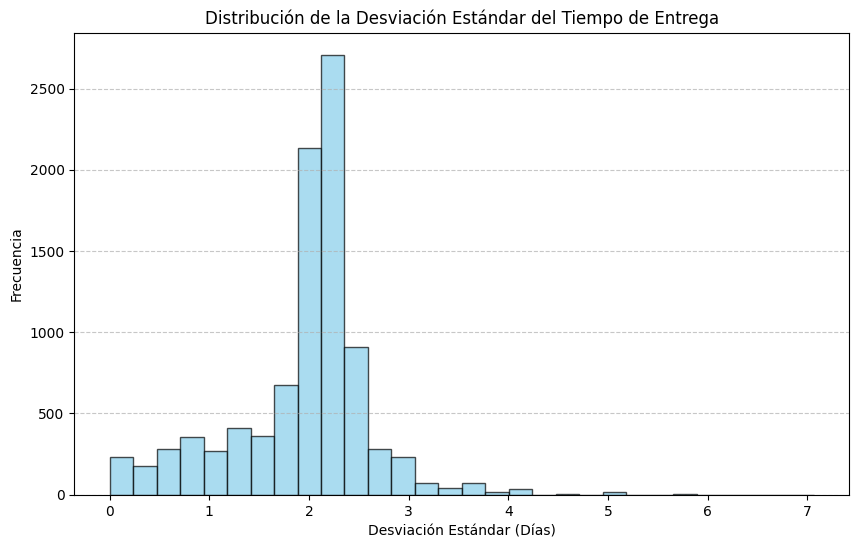

In [24]:
# Calcular desviación estándar del tiempo de entrega
LT_summary['Std_LT_inDays'] = purchases_f.groupby(['Brand', 'Description'])['Lead_Time'].std().round(2).reset_index(drop=True)

# Calcular proporción de pedidos entregados en menos de X días (por ejemplo, 7 días)
LT_summary['On_Time_Rate'] = purchases_f.groupby(['Brand', 'Description']).apply(
    lambda group: (group['Lead_Time'] <= 7).mean(), include_groups=False
).round(2).reset_index(drop=True)

# Histograma de desviación estándar del tiempo de entrega
plt.figure(figsize=(10, 6))
plt.hist(LT_summary['Std_LT_inDays'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribución de la Desviación Estándar del Tiempo de Entrega")
plt.xlabel("Desviación Estándar (Días)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
# Stock de seguridad e inventario disponible
# Como el stock de seguridad mide la cantidad de inventario de reserva que se debe tener, se debe
# determinar el stock de seguridad óptimo en función de la cantidad de ventas 
# y la cantidad de stock de seguridad necesaria para que las ventas se realicen sin problemas.

In [26]:
# Convertir SalesDate a formato datetime
sales_f['SalesDate'] = pd.to_datetime(sales_f['SalesDate'], errors='coerce')

# Realizar el resumen de ventas
sales_f_summary = sales_f.groupby(['Brand', 'Description']).agg(
                        Max_Sales_Qty=("SalesQuantity", 'max'),
                        Min_Sales_Qty=("SalesQuantity", 'min'),
                        Tot_SalesQty=('SalesQuantity', 'sum')).reset_index()

# Calcular las ventas por día de cada producto agrupado por marca
total_sales_days = (sales_f['SalesDate'].max() - sales_f['SalesDate'].min()).days
sales_f_summary['Avg_Sales/Day'] = (sales_f_summary['Tot_SalesQty'] / total_sales_days).round(2)

# Unir el tiempo de entrega y los datos de ventas
Safty_stock = pd.merge(sales_f_summary, LT_summary, on = ["Brand", "Description"])

# Calcular el stock de seguridad óptimo y stock máximo necesario
Safty_stock["Optimal_SS"] = np.ceil(Safty_stock["Avg_LT_inDays"] * Safty_stock["Avg_Sales/Day"]).round(0)
Safty_stock["Max_SS"] = np.ceil(Safty_stock["Max_LT_inDays"] * Safty_stock["Avg_Sales/Day"]).round(0)

# Identificar outliers en las ventas
q1 = sales_f_summary['Avg_Sales/Day'].quantile(0.25)
q3 = sales_f_summary['Avg_Sales/Day'].quantile(0.75)
iqr = q3 - q1
outlier_threshold_low = q1 - 1.5 * iqr
outlier_threshold_high = q3 + 1.5 * iqr

# Filtrar productos sin outliers
filtered_data = sales_f_summary[
    (sales_f_summary['Avg_Sales/Day'] >= outlier_threshold_low) &
    (sales_f_summary['Avg_Sales/Day'] <= outlier_threshold_high)
]

# Verificar los resultados
print(sales_f_summary.head())

   Brand                  Description  Max_Sales_Qty  Min_Sales_Qty  \
0     58  Gekkeikan Black & Gold Sake              7              1   
1     60       Canadian Club 1858 VAP              3              1   
2     61        Margaritaville Silver             12             12   
3     62     Herradura Silver Tequila              3              1   
4     63   Herradura Reposado Tequila              4              1   

   Tot_SalesQty  Avg_Sales/Day  
0           288           4.88  
1           124           2.10  
2            24           0.41  
3           162           2.75  
4           131           2.22  


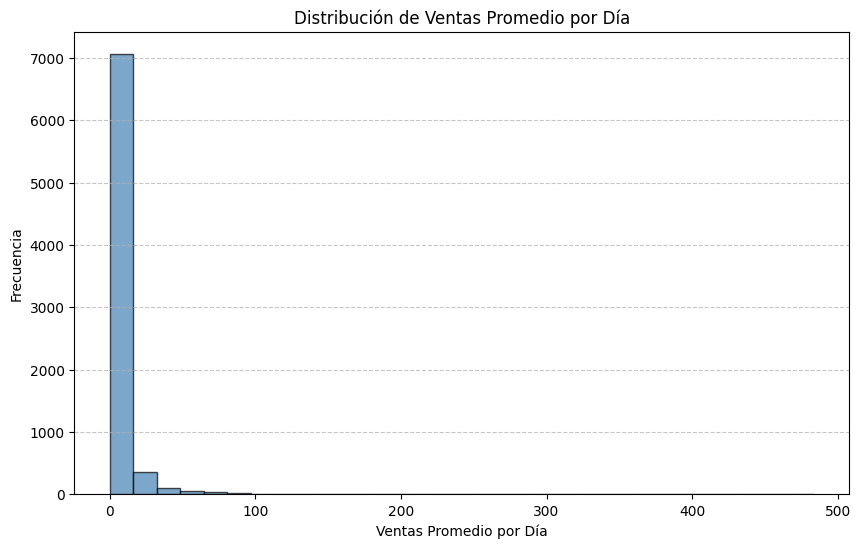

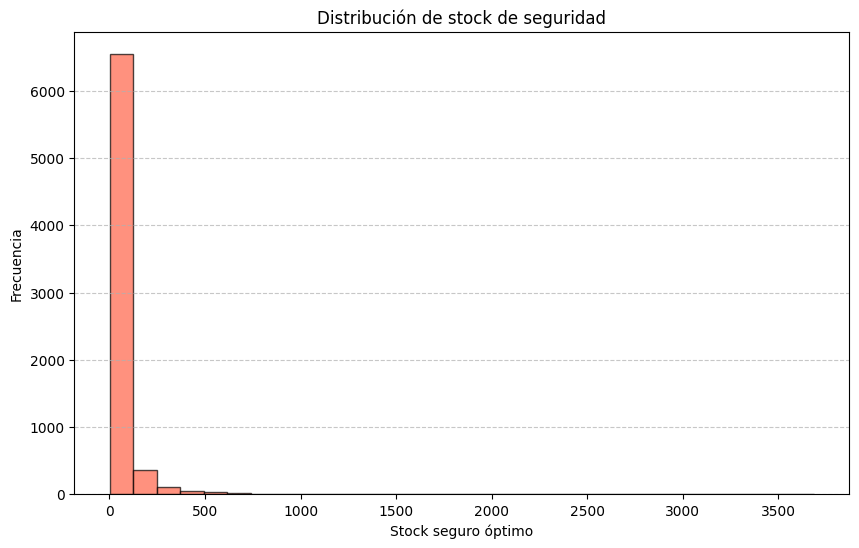

In [27]:
# Histograma de ventas promedio por día
plt.figure(figsize=(10, 6))
plt.hist(sales_f_summary['Avg_Sales/Day'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.title("Distribución de Ventas Promedio por Día")
plt.xlabel("Ventas Promedio por Día")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histograma de distribución óptima del stock seguro
plt.figure(figsize=(10, 6))
plt.hist(Safty_stock['Optimal_SS'], bins=30, color='tomato', edgecolor='black', alpha=0.7)
plt.title("Distribución de stock de seguridad")
plt.xlabel("Stock seguro óptimo")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
# Los histogramas representan el recuento de stock de seguridad requerido para cada marca 
# junto con sus ventas diarias promedio.
# Sin embargo, debido a que los datos están muy sesgados hacia la izquierda, la distribución 
# de los puntos de datos en el lado derecho no es claramente visible.

# Para poder visualizar esto mejor, utilizaremos un diagrama de caja.

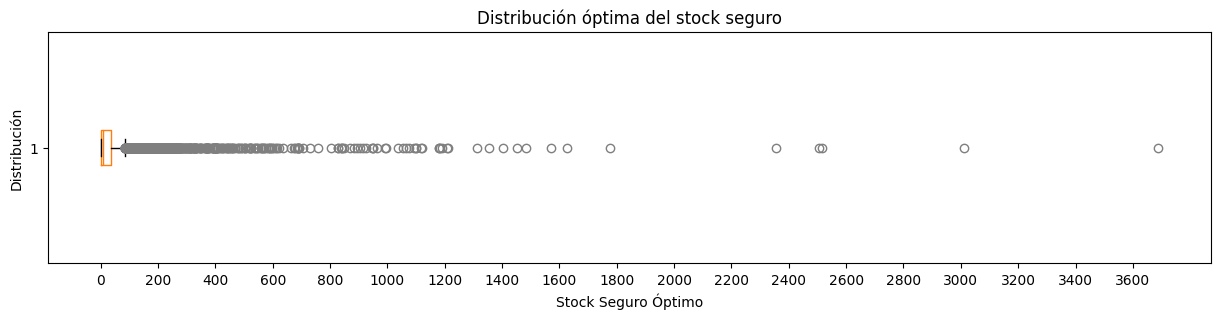

In [29]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.boxplot(Safty_stock['Optimal_SS'], vert=False, boxprops=dict(color='tab:orange'),  
                            flierprops=dict(markeredgecolor='tab:gray'))
ax.set_xticks(range(0, int(Safty_stock["Optimal_SS"].max()) + 1, 200)) 
ax.set_title('Distribución óptima del stock seguro')
ax.set_xlabel('Stock Seguro Óptimo')
ax.set_ylabel('Distribución')
plt.show()

In [30]:
# Como podemos observar, la mayoría de los productos requieren un stock de seguridad de entre cero y 200. 
# Sin embargo, el diagrama de caja muestra que algunos productos necesitan hasta 3500 unidades en existencias 
# de seguridad.


In [31]:
# Evaluar el inventario disponible.
# Se tendra en cuenta el inventario final, como inventario disponible.

Inv_Shortage/Surplus
Inv_Surplus     5994
Inv_Shortage    1105
Balance           47
Name: count, dtype: int64


/tmp/ipykernel_5398/3815508752.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=onhand_inv_data, x="Inv_Shortage/Surplus", y="Inventory_Status", ax=ax, palette="Set2")


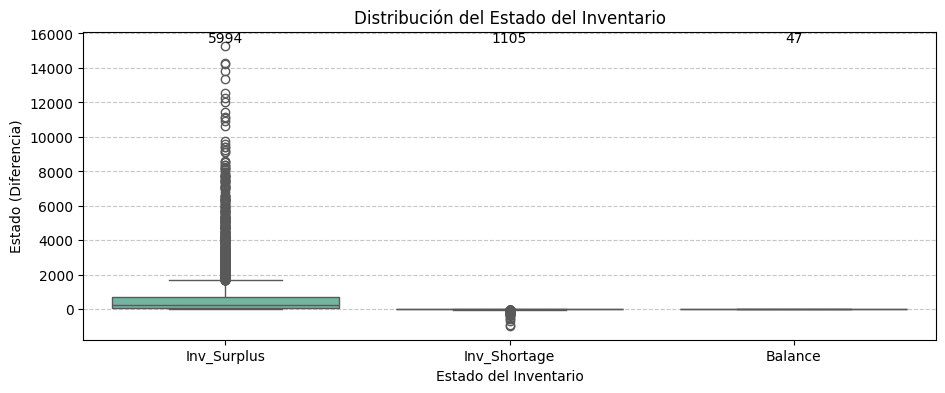

In [32]:
# Analisis de inventario final disponible por marca
# Filtrar inventario más reciente
latest_onhand_inv = end_inv_f[end_inv_f['endDate'] == end_inv_f['endDate'].max()] \
                    .groupby(['Brand', 'Description']).agg(Onhand_Stock=('onHand', 'sum')).reset_index()

# Unión con Safty_stock
onhand_inv_data = Safty_stock.merge(latest_onhand_inv, on=['Brand', 'Description'], how='left').fillna({'Onhand_Stock': 0})

# Calcular estado del inventario
onhand_inv_data['Inventory_Status'] = onhand_inv_data['Onhand_Stock'] - onhand_inv_data['Optimal_SS']
onhand_inv_data['Inv_Shortage/Surplus'] = np.where(
    onhand_inv_data['Inventory_Status'] < 0, 'Inv_Shortage',
    np.where(onhand_inv_data['Inventory_Status'] == 0, 'Balance', 'Inv_Surplus')
)

# Resumen de categorías
print(onhand_inv_data['Inv_Shortage/Surplus'].value_counts())

# Visualización de estados del inventario
fig, ax = plt.subplots(figsize=(11, 4))
sns.boxplot(data=onhand_inv_data, x="Inv_Shortage/Surplus", y="Inventory_Status", ax=ax, palette="Set2")

# Agregar conteos en el gráfico
counts = onhand_inv_data['Inv_Shortage/Surplus'].value_counts()
for i, count in enumerate(counts):
    ax.text(i, onhand_inv_data['Inventory_Status'].max(), str(count), ha='center', va='bottom', fontsize=10)

# Etiquetas y título
plt.xlabel("Estado del Inventario")
plt.ylabel("Estado (Diferencia)")
plt.title("Distribución del Estado del Inventario")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [33]:
# El gráfico muestra que la empresa tiene un inventario excesivo de un 84% de sus productos, lo que le genera
# costos de mantenimiento de inventario sustanciales.
# Por otro lado, hay un 15% de déficit en el inventario.
# Por lo tanto, solo un 1% del inventario presenta un stock equilibrado.

# La empresa debe abordar este problema reduciendo el excedente de inventario y cubriendo los faltantes
# de inventario para mantener el equilibrio.

In [34]:
# Analizar cuales son los mejores y peores productos al comienzo y al final del año

# Agrupar por marca y descripción y resumir el inventario de principios de año
beg_summary = beg_inv.groupby(['Brand', 'Description'])['onHand'].sum().reset_index().sort_values(by='onHand', ascending=False)

# Agrupar por marca y descripción y resumir el inventario de final de año
end_summary = end_inv.groupby(['Brand', 'Description'])['onHand'].sum().reset_index().sort_values(by='onHand', ascending=False)

# Identificar los 5 mejores productos al principio y al final del año
top_5_beg = beg_summary.head(5)
top_5_end = end_summary.head(5)

# Identificar los 5 productos con peores resultados al principio y al final del año
bottom_5_beg = beg_summary.tail(5)
bottom_5_end = end_summary.tail(5)

print("Top 5 productos al comienzo de año:\n", top_5_beg)
print("\nTop 5 productos al final del año:\n", top_5_end)
print("\nPeores 5 productos al principio del año:\n", bottom_5_beg)
print("\nPeores 5 productos al final del año:\n", bottom_5_end)

Top 5 productos al comienzo de año:
       Brand                 Description  onHand
1748   4261      Capt Morgan Spiced Rum   15499
2635   8068            Absolut 80 Proof   15341
1580   3876           Smirnoff 80 Proof   14829
1389   3545             Ketel One Vodka   14499
2474   6879  Maurice's Mentholated Mint   14180

Top 5 productos al final del año:
       Brand              Description  onHand
1507   3545          Ketel One Vodka   16770
1876   4261   Capt Morgan Spiced Rum   16769
2837   8111        Smirnoff 80 Proof   16242
2817   8068         Absolut 80 Proof   15608
496    1233  Jack Daniels No 7 Black   15047

Peores 5 productos al principio del año:
       Brand                  Description  onHand
3325  13082          Cakebread Chard Rsv       0
4065  17291    Westrey Oracle Vyd Pnt Nr       0
2151   5596  Smirnoff Grand Cosmopolitan       0
2453   6762          Paul Masson Chablis       0
3549  14491  Wachau Federspiel Veltliner       0

Peores 5 productos al final del

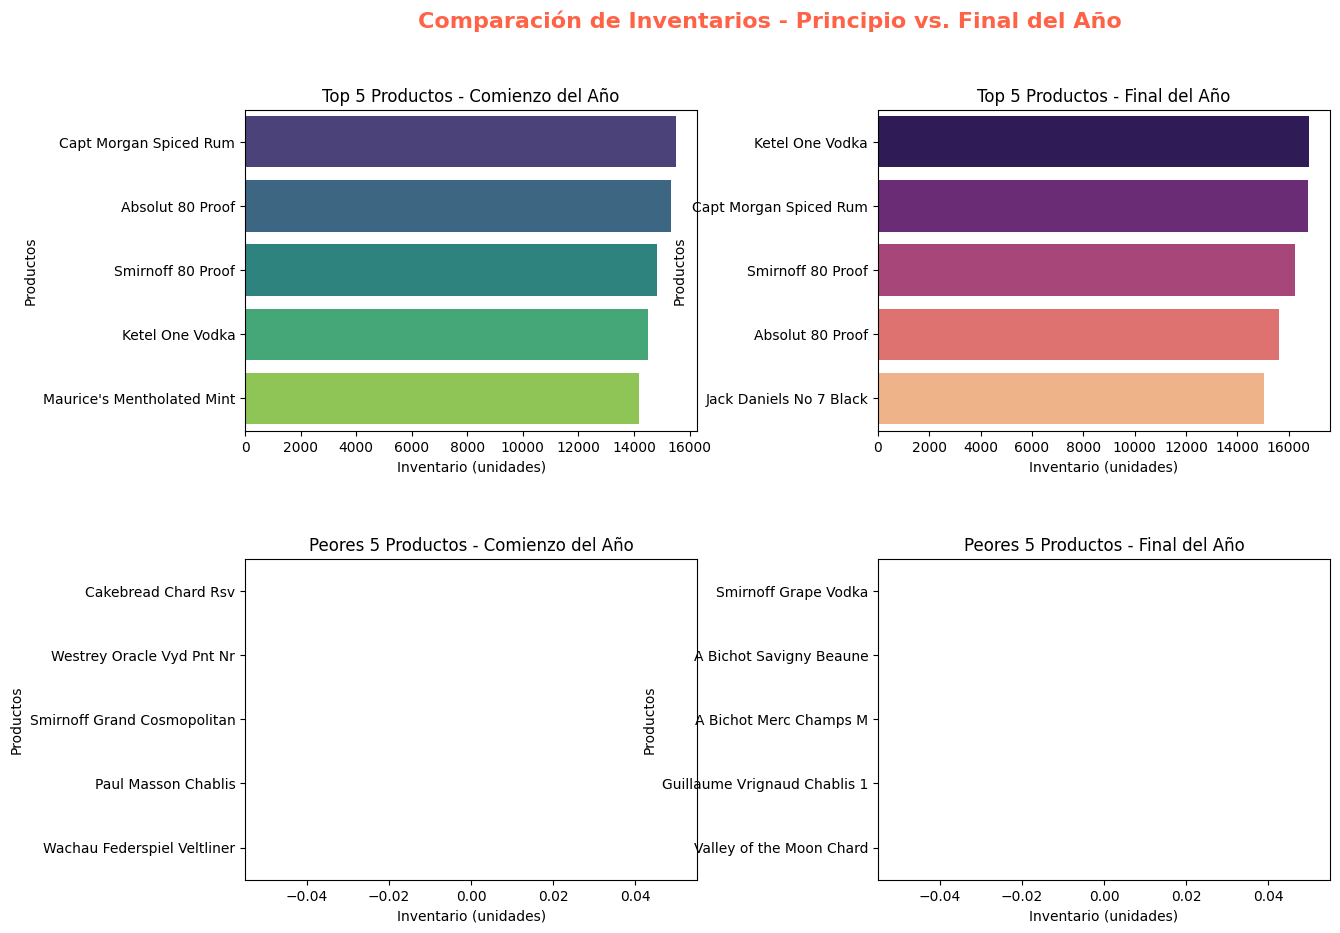

In [35]:
# Si graficamos esto:

# Validar que los datos existan para cada subconjunto
if not top_5_beg.empty:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'hspace': 0.4, 'wspace': 0.4})

    # Top 5 productos al comienzo del año
    sns.barplot(ax=axes[0, 0], x=top_5_beg['onHand'], y=top_5_beg['Description'], hue=top_5_beg['Description'], 
                palette="viridis", dodge=False, legend=False)
    axes[0, 0].set_title("Top 5 Productos - Comienzo del Año")
    axes[0, 0].set_xlabel("Inventario (unidades)")
    axes[0, 0].set_ylabel("Productos")

    # Top 5 productos al final del año
    sns.barplot(ax=axes[0, 1], x=top_5_end['onHand'], y=top_5_end['Description'], hue=top_5_end['Description'], 
                palette="magma", dodge=False, legend=False)
    axes[0, 1].set_title("Top 5 Productos - Final del Año")
    axes[0, 1].set_xlabel("Inventario (unidades)")
    axes[0, 1].set_ylabel("Productos")

    # Validar si existen datos para los peores productos al inicio del año
    if not bottom_5_beg.empty:
        sns.barplot(ax=axes[1, 0], x=bottom_5_beg['onHand'], y=bottom_5_beg['Description'], hue=bottom_5_beg['Description'], 
                    palette="cool", dodge=False, legend=False)
        axes[1, 0].set_title("Peores 5 Productos - Comienzo del Año")
        axes[1, 0].set_xlabel("Inventario (unidades)")
        axes[1, 0].set_ylabel("Productos")
    else:
        axes[1, 0].text(0.5, 0.5, "Sin datos", fontsize=14, ha='center', va='center')
        axes[1, 0].set_title("Peores 5 Productos - Comienzo del Año")

    # Validar si existen datos para los peores productos al final del año
    if not bottom_5_end.empty:
        sns.barplot(ax=axes[1, 1], x=bottom_5_end['onHand'], y=bottom_5_end['Description'], hue=bottom_5_end['Description'], 
                    palette="autumn", dodge=False, legend=False)
        axes[1, 1].set_title("Peores 5 Productos - Final del Año")
        axes[1, 1].set_xlabel("Inventario (unidades)")
        axes[1, 1].set_ylabel("Productos")
    else:
        axes[1, 1].text(0.5, 0.5, "Sin datos", fontsize=14, ha='center', va='center')
        axes[1, 1].set_title("Peores 5 Productos - Final del Año")

    # Título global
    plt.suptitle("Comparación de Inventarios - Principio vs. Final del Año", fontsize=16, weight='bold', color='tomato')
    plt.show()
else:
    print("No hay datos suficientes para realizar los gráficos.")

In [36]:
# Se puede observa que los últimos 2 gráficos están vacíos, esto se debe a que no hay existencias de dichos productos en el inventario,
# ya sea incial o final.

In [37]:
# Analisis de productos más y menos vendidos.

In [38]:
# Encontrar los productos más vendidos
best_selling_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=False).head(10)
print(f"Los diez productos más vendidos:\n{best_selling_products}\n")

# Encontrar los productos con menor movimiento
slow_moving_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=True).head(10)
print(f"Diez productos de menor movimiento:\n{slow_moving_products}")

Los diez productos más vendidos:
                                    SalesQuantity
Brand Description                                
8111  Smirnoff 80 Proof                     28544
1892  Yukon Jack                            23121
4261  Capt Morgan Spiced Rum                20226
3606  Smirnoff Raspberry Vodka              19200
5111  Dr McGillicuddy's Mentholmnt          18411
3837  Skyy Vodka                            14057
4135  Smirnoff Blueberry Vodka              12477
4157  Smirnoff Green Apple Vodka            12102
3545  Ketel One Vodka                       11883
8068  Absolut 80 Proof                      11189

Diez productos de menor movimiento:
                                    SalesQuantity
Brand Description                                
19833 Terra di Montevero Toscana                1
105   Mr Boston Butterscotch                    1
21339 Flowers Sonoma Cst Chard                  1
15835 Ninety+Cellars Lot 33 Rose                1
44278 Scala Dei Negre Priorat 

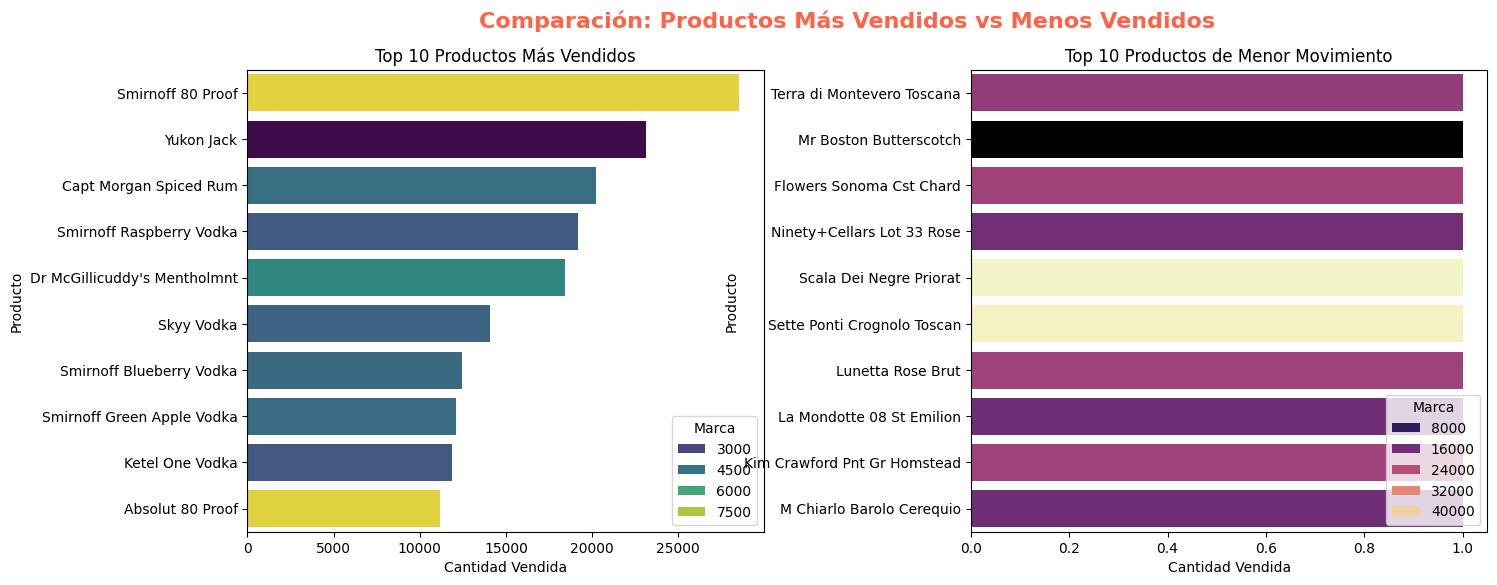

In [39]:
# Graficar los productos más vendidos
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'wspace': 0.4})

# Gráfico de los 10 productos más vendidos
sns.barplot(
    ax=axes[0], 
    data=best_selling_products.reset_index(), 
    x='SalesQuantity', 
    y='Description', 
    hue='Brand', 
    dodge=False, 
    palette='viridis'
)
axes[0].set_title("Top 10 Productos Más Vendidos")
axes[0].set_xlabel("Cantidad Vendida")
axes[0].set_ylabel("Producto")
axes[0].legend(title="Marca", loc='lower right')

# Gráfico de los 10 productos de menor movimiento
sns.barplot(
    ax=axes[1], 
    data=slow_moving_products.reset_index(), 
    x='SalesQuantity', 
    y='Description', 
    hue='Brand', 
    dodge=False, 
    palette='magma'
)
axes[1].set_title("Top 10 Productos de Menor Movimiento")
axes[1].set_xlabel("Cantidad Vendida")
axes[1].set_ylabel("Producto")
axes[1].legend(title="Marca", loc='lower right')

# Título general
plt.suptitle("Comparación: Productos Más Vendidos vs Menos Vendidos", fontsize=16, weight='bold', color='tomato')
plt.show()

In [40]:
# Análisis adicionales 

In [41]:
# Calcular el importe total para beg_inv
beg_inv["ImporteInicial"] = beg_inv["onHand"] * beg_inv["Price"]
importe_total_inicial = beg_inv["ImporteInicial"].sum()

# Calcular el importe total para end_inv
end_inv["ImporteFinal"] = end_inv["onHand"] * end_inv["Price"]
importe_total_final = end_inv["ImporteFinal"].sum()

# Imprimir los resultados
print(f"Importe total del inventario inicial (beg_inv): {importe_total_inicial:.2f}")
print(f"Importe total del inventario final (end_inv): {importe_total_final:.2f}")

# Calcular la diferencia entre el inventario inicial y final
diferencia = importe_total_final - importe_total_inicial
print(f"Diferencia entre inventarios: {diferencia:.2f}")

Importe total del inventario inicial (beg_inv): 68053780.17
Importe total del inventario final (end_inv): 79704851.13
Diferencia entre inventarios: 11651070.96


In [42]:
# Productos más comprados (con coste total)
best_purchased_products = purchases.groupby(['Brand', 'Description']).agg({
    'Quantity': 'sum',
    'Dollars': 'sum'  # Suponiendo que esta columna contiene el coste total de las compras
}).sort_values(by='Quantity', ascending=False).head(10)

print(f"Los diez productos más comprados (con costo total):\n{best_purchased_products}\n")

# Productos de compra lenta (con coste total)
slow_moving_purchases = purchases.groupby(['Brand', 'Description']).agg({
    'Quantity': 'sum',
    'Dollars': 'sum'
}).sort_values(by='Quantity', ascending=True).head(120)

print(f"Los 100 productos más comprados con menor movimiento (con costo total):\n{slow_moving_purchases}")

Los diez productos más comprados (con costo total):
                                    Quantity     Dollars
Brand Description                                       
8111  Smirnoff 80 Proof               337660   259998.20
1892  Yukon Jack                      254824   183473.28
5111  Dr McGillicuddy's Mentholmnt    244654   176150.88
3606  Smirnoff Raspberry Vodka        226085   167302.90
6570  Kendall Jackson Chard Vt RSV    215668  1460072.36
4261  Capt Morgan Spiced Rum          201682  3261197.94
8068  Absolut 80 Proof                187407  3418303.68
3405  Tito's Handmade Vodka           164038  3804041.22
3837  Skyy Vodka                      163375   117630.00
3102  Smirnoff Traveler               161386  2088334.84

Los 100 productos más comprados con menor movimiento (con costo total):
                                    Quantity  Dollars
Brand Description                                    
122   DeKuyper Mixed Berry Medley          1     7.96
36069 Ch Lagrange 10         

In [43]:
# Productos con una cantidad total de compra exactamente uno

# Agrupar datos para calcular cantidades y costes
low_movement_products = purchases.groupby(['Brand', 'Description']).agg({
    'Quantity': 'sum',
    'Dollars': 'sum'
}).sort_values(by='Quantity', ascending=True)

# Filtrar los productos cuya cantidad total comprada es exactamente uno
products_quantity_one = low_movement_products[low_movement_products['Quantity'] == 1]

# Exportar a un archivo Excel
output_file = "low_movement_products_quantity_one.xlsx"
products_quantity_one.to_excel(output_file, index=True)

print(f"Los productos con una cantidad de compra de exactamente uno se han exportado a:'{output_file}'")

Los productos con una cantidad de compra de exactamente uno se han exportado a:'low_movement_products_quantity_one.xlsx'


In [44]:
# Agrupar datos para calcular cantidades y costes
low_movement_products = purchases.groupby(['Brand', 'Description']).agg({
    'Quantity': 'sum',
    'Dollars': 'sum'
}).sort_values(by='Quantity', ascending=True)

# Filtrar los productos cuya cantidad total comprada es exactamente uno
products_quantity_one = low_movement_products[low_movement_products['Quantity'] == 1]

# Contar cuántos productos cumplen la condición
total_products = products_quantity_one.shape[0]

# Calcular el importe total de estos productos
total_amount = products_quantity_one['Dollars'].sum()

# Mostrar los resultados
print(f"Número total de productos con una cantidad de compra de exactamente uno: {total_products}")
print(f"Importe total asociado a estos productos: ${total_amount:.2f}")

Número total de productos con una cantidad de compra de exactamente uno: 182
Importe total asociado a estos productos: $14130.87


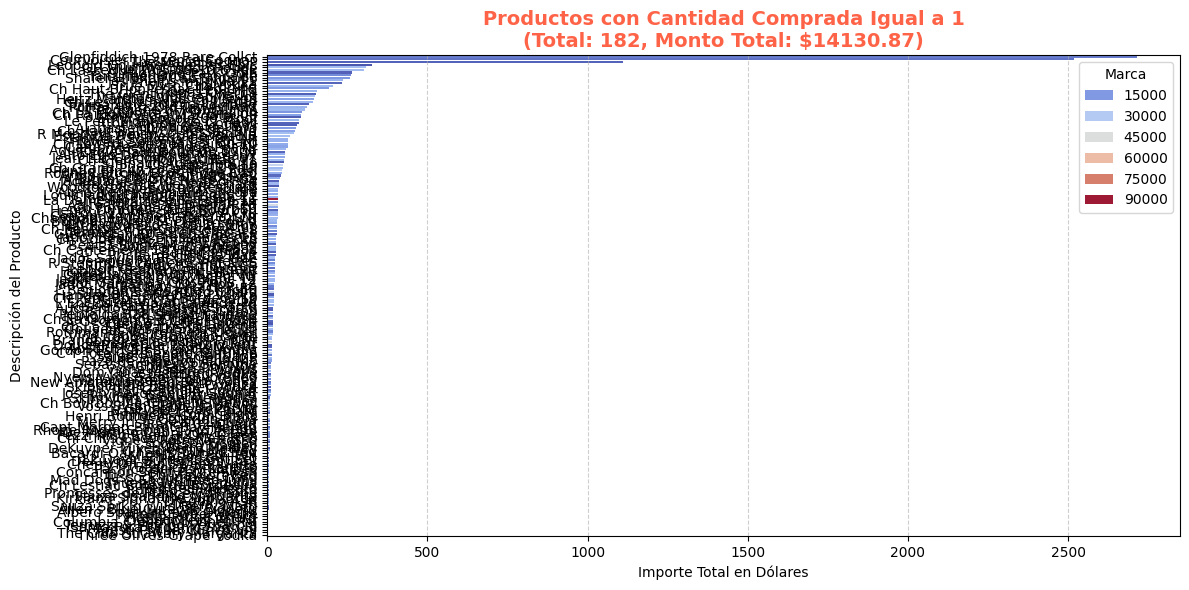

In [45]:
# Preparar datos para graficar
products_quantity_one = products_quantity_one.reset_index()  # Restablecer índice para facilitar el acceso
products_quantity_one = products_quantity_one.sort_values(by='Dollars', ascending=False)  # Ordenar por coste

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    data=products_quantity_one, 
    x='Dollars', 
    y='Description', 
    hue='Brand', 
    dodge=False, 
    palette='coolwarm'
)

# Etiquetas y título
plt.title(f"Productos con Cantidad Comprada Igual a 1\n(Total: {total_products}, Monto Total: ${total_amount:.2f})", fontsize=14, weight='bold', color='tomato')
plt.xlabel("Importe Total en Dólares")
plt.ylabel("Descripción del Producto")
plt.legend(title="Marca", loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [46]:
# Podemos notar que el gráfico no es lo suficientemente claro, esto se debe a la cantidad de datos disponibles.

In [47]:
# Compras totales por mes:

# Asegurar que la columna de fecha está en formato datetime
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'])

# Crear una nueva columna con el mes y año
purchases['YearMonth'] = purchases['ReceivingDate'].dt.to_period('M')

# Agrupar por mes y calcular el total de compras
monthly_purchases = purchases.groupby('YearMonth').agg({
    'Quantity': 'sum',
    'Dollars': 'sum'  # Supongamos que 'Dollars' representa el coste total de la compra
}).sort_index()

# Mostrar resultados
print("Compras totales por mes::")
print(monthly_purchases)

# Exportar a un archivo Excel
output_file = "monthly_purchases_summary.xlsx"
monthly_purchases.to_excel(output_file, index=True)

print(f"El resumen de compras mensual se ha exportado a: '{output_file}'")

Compras totales por mes::
           Quantity      Dollars
YearMonth                       
2016-01     2232313  20514449.18
2016-02     2182428  19833840.75
2016-03     2319276  20983950.16
2016-04     2218612  20886046.39
2016-05     2778905  26439770.66
2016-06     3025276  29120996.18
2016-07     3322525  33408384.45
2016-08     3328118  31454989.01
2016-09     2953690  27521421.07
2016-10     2788824  27720973.77
2016-11     3051058  31565630.22
2016-12     3383352  32450313.69
El resumen de compras mensual se ha exportado a: 'monthly_purchases_summary.xlsx'


In [48]:
# Convertir columnas de fecha a datetime
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'], errors='coerce')
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'], errors='coerce')

# Verificar si alguna conversión falló
if purchases['ReceivingDate'].isna().any():
    print("Hay valores nulos o no convertibles en 'ReceivingDate'. Verifica los datos.")
if sales['SalesDate'].isna().any():
    print("Hay valores nulos o no convertibles en 'SalesDate'. Verifica los datos.")

# Crear una columna con el mes y año en ambas tablas
purchases['YearMonth'] = purchases['ReceivingDate'].dt.to_period('M')
sales['YearMonth'] = sales['SalesDate'].dt.to_period('M')

# Agrupar por mes y calcular el total de compras y ventas
monthly_purchases = purchases.groupby('YearMonth').agg({
    'Dollars': 'sum'  # Supongamos que 'Dollars' representa el coste total de las compras
}).rename(columns={'Dollars': 'TotalPurchases'})

monthly_sales = sales.groupby('YearMonth').agg({
    'SalesDollars': 'sum'  # Supongamos que 'SalesDollars' representa el ingreso total de las ventas
}).rename(columns={'SalesDollars': 'TotalSales'})

# Encontrar el primer mes común en ambas tablas
first_month = min(monthly_purchases.index.min(), monthly_sales.index.min())

# Obtener los valores del primer mes
purchases_first_month = monthly_purchases.loc[first_month, 'TotalPurchases'] if first_month in monthly_purchases.index else 0
sales_first_month = monthly_sales.loc[first_month, 'TotalSales'] if first_month in monthly_sales.index else 0

# Calcular la diferencia y el porcentaje
difference = sales_first_month - purchases_first_month
percentage_difference = (difference / purchases_first_month * 100) if purchases_first_month > 0 else None

# Mostrar resultados
print(f"Primer mes: {first_month}")
print(f"Compras totales en el primer mes: ${purchases_first_month:.2f}")
print(f"Ventas totales en el primer mes: ${sales_first_month:.2f}")
print(f"Diferencia (Ventas - Compras): ${difference:.2f}")
if percentage_difference is not None:
    print(f"Diferencia en porcentaje: {percentage_difference:.2f}%")
else:
    print("Diferencia en porcentaje: N/A (Las compras son cero o no están definidas)")

Primer mes: 2016-01
Compras totales en el primer mes: $20514449.18
Ventas totales en el primer mes: $29854027.92
Diferencia (Ventas - Compras): $9339578.74
Diferencia en porcentaje: 45.53%


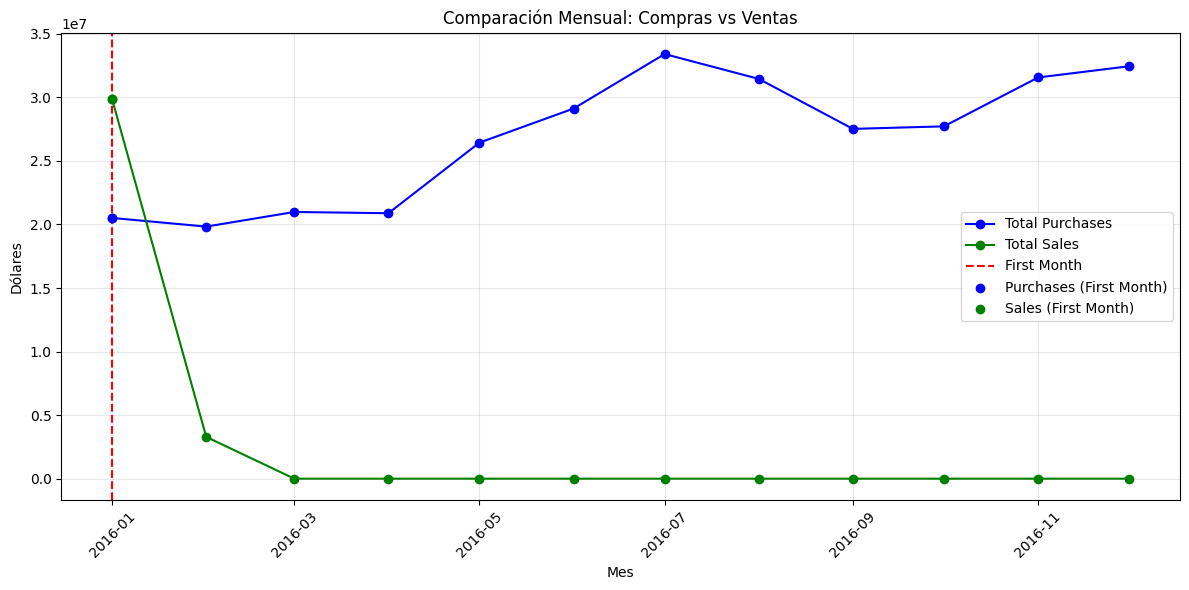

In [49]:
# Asegurar que ambos DataFrames tengan un índice datetime
monthly_purchases.index = monthly_purchases.index.to_timestamp()
monthly_sales.index = monthly_sales.index.to_timestamp()

# Fusionar las tablas para facilitar el graficado
combined_data = monthly_purchases.join(monthly_sales, how='outer').fillna(0)

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['TotalPurchases'], label='Total Purchases', marker='o', color='blue')
plt.plot(combined_data.index, combined_data['TotalSales'], label='Total Sales', marker='o', color='green')

# Resaltar el primer mes
if first_month:
    first_month_date = first_month.to_timestamp()
    plt.axvline(x=first_month_date, color='red', linestyle='--', label='First Month')
    plt.scatter(first_month_date, purchases_first_month, color='blue', zorder=5, label='Purchases (First Month)')
    plt.scatter(first_month_date, sales_first_month, color='green', zorder=5, label='Sales (First Month)')

# Personalizar el gráfico
plt.title('Comparación Mensual: Compras vs Ventas')
plt.xlabel('Mes')
plt.ylabel('Dólares')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [50]:
# El gráfico muestra que las compras son mayores que las ventas durante varios meses consecutivos, esto podría significar que:

# - Se está adquiriendo más inventario del necesario.
# - Podría haber un problema de rotación de inventarios, lo que conllevaría a costos de almacenamiento elevados.


# Si las ventas son mayores que las compras en la mayoría de los meses:

# - Esto podría ser positivo, mostrando una buena utilización del inventario, 
# pero es importante monitorear para evitar quedarse sin existencias.

In [51]:
# Calcular el margen
margin = 0.45

# Agrupar las compras por mes y calcular el total
annual_purchases = purchases.groupby('YearMonth').agg({
    'Dollars': 'sum'  # Supongamos que 'Dollars' representa el coste total de las compras
}).rename(columns={'Dollars': 'TotalPurchases'})

# Calcular las ventas estimadas para todo el año con el margen aplicado
annual_purchases['EstimatedSales'] = annual_purchases['TotalPurchases'] * (1 + margin)

# Calcular el total anual de compras y ventas estimadas
total_purchases = annual_purchases['TotalPurchases'].sum()
total_estimated_sales = annual_purchases['EstimatedSales'].sum()

# Mostrar los resultados
print(f"Compras totales del año: ${total_purchases:.2f}")
print(f"Ventas totales estimadas para el año (margen del 45%): ${total_estimated_sales:.2f}")

# Mostrar el desglose mensual (opcional)
print("\nDesglose mensual::")
print(annual_purchases)


Compras totales del año: $321900765.53
Ventas totales estimadas para el año (margen del 45%): $466756110.02

Desglose mensual::
           TotalPurchases  EstimatedSales
YearMonth                                
2016-01       20514449.18    2.974595e+07
2016-02       19833840.75    2.875907e+07
2016-03       20983950.16    3.042673e+07
2016-04       20886046.39    3.028477e+07
2016-05       26439770.66    3.833767e+07
2016-06       29120996.18    4.222544e+07
2016-07       33408384.45    4.844216e+07
2016-08       31454989.01    4.560973e+07
2016-09       27521421.07    3.990606e+07
2016-10       27720973.77    4.019541e+07
2016-11       31565630.22    4.577016e+07
2016-12       32450313.69    4.705295e+07


In [52]:
# Calcular la diferencia entre las ventas estimadas y las compras totales
difference = total_estimated_sales - total_purchases

# Calcular el porcentaje de diferencia
percentage_difference = (difference / total_purchases) * 100 if total_purchases > 0 else None

# Mostrar los resultados
print(f"Compras totales del año: ${total_purchases:.2f}")
print(f"Ventas totales estimadas para el año (margen del 45%): ${total_estimated_sales:.2f}")
print(f"Diferencia (Ventas - Compras): ${difference:.2f}")
if percentage_difference is not None:
    print(f"Diferencia en porcentaje: {percentage_difference:.2f}%")
else:
    print("Diferencia en porcentaje: N/A (Las compras son cero o no están definidas)")

Compras totales del año: $321900765.53
Ventas totales estimadas para el año (margen del 45%): $466756110.02
Diferencia (Ventas - Compras): $144855344.49
Diferencia en porcentaje: 45.00%


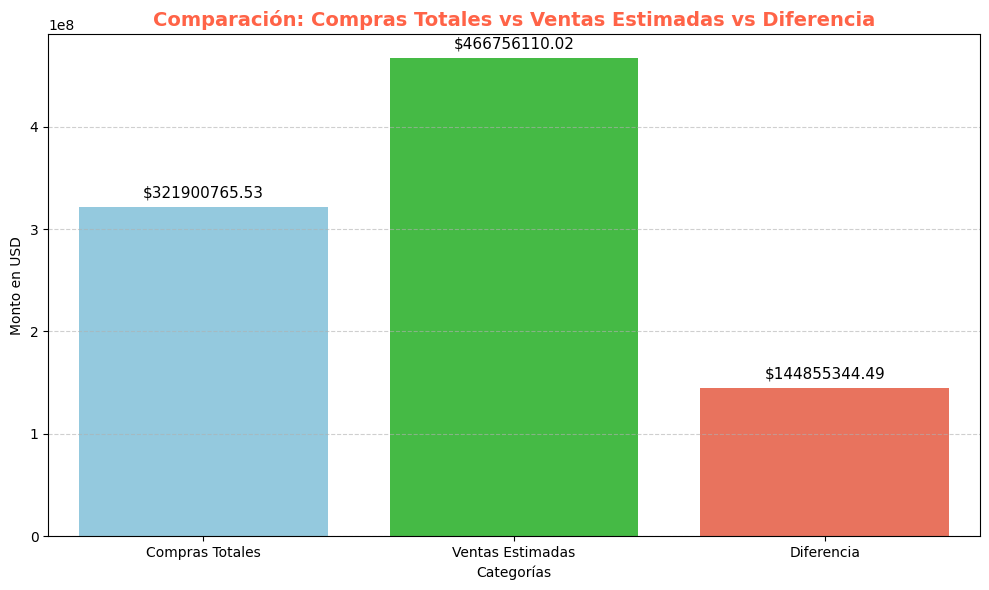

In [53]:
# Crear un DataFrame para las métricas clave
data = {
    'Categoría': ['Compras Totales', 'Ventas Estimadas', 'Diferencia'],
    'Monto': [total_purchases, total_estimated_sales, difference]
}
metrics_df = pd.DataFrame(data)

# Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=metrics_df, 
    x='Categoría', 
    y='Monto', 
    hue='Categoría',  # Usamos 'Categoría' como variable para el color
    dodge=False, 
    palette=['skyblue', 'limegreen', 'tomato'],
    legend=False  # Evitamos agregar una leyenda extra
)

# Etiquetas y personalización
plt.title("Comparación: Compras Totales vs Ventas Estimadas vs Diferencia", fontsize=14, weight='bold', color='tomato')
plt.ylabel("Monto en USD")
plt.xlabel("Categorías")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Agregar valores sobre las barras
for i, value in enumerate(metrics_df['Monto']):
    plt.text(i, value + (max(metrics_df['Monto']) * 0.02), f"${value:.2f}", ha='center', fontsize=11)

# Mostrar el gráfico
plt.tight_layout()
plt.show()